In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/2022/공모전'

/content/drive/MyDrive/2022/공모전


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fbprophet
print(fbprophet.__version__)

0.7.1


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import platform
import datetime
from datetime import datetime
# 그래프 폰트 설정
# Window
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False

# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
# 여러가지 머신러닝 모델을 가지고 있는 라이브러리 *가장 많이 사용* 
import sklearn
# 공통 모듈 임포트
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split 

# 깔끔한 그래프 출력을 위해
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
#data불러오기
export = pd.read_csv('export.csv')
submission = pd.read_csv('submission.csv', encoding= 'unicode_escape')

In [ ]:
# 변수명 변경
export.columns = ['기간','한국_수출금액', '한국의_중국_수출', '한국의_미국_수출', '한국의_베트남_수출','한국의_홍콩_수출','한국의_일본_수출']
submission.columns = ['기간','한국_수출금액']

In [ ]:
# 기간 날짜데이터로 바꿔주기
export['기간'] = pd.to_datetime(export['기간'])
submission['기간'] = pd.to_datetime(submission['기간'])

In [ ]:
df = export.iloc[:,0:2]

In [ ]:
# 컬럼명 변경
df.columns = ['month', 'export']

# 데이터 타입 변경
df['month']= pd.to_datetime(df['month'])

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']

# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

# 모델 생성
from fbprophet import Prophet
model = Prophet()

# 모델 학습
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# train set 마지막 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2021-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

In [ ]:
# 에측
forecast = model.predict(last_1year)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


          ds          yhat    yhat_lower    yhat_upper
0 2021-01-01  4.623652e+10  4.151377e+10  5.110224e+10
1 2021-02-01  4.531260e+10  4.054914e+10  5.031362e+10
2 2021-03-01  4.978245e+10  4.533817e+10  5.475095e+10
3 2021-04-01  4.887446e+10  4.412285e+10  5.351893e+10
4 2021-05-01  4.830011e+10  4.342183e+10  5.321800e+10


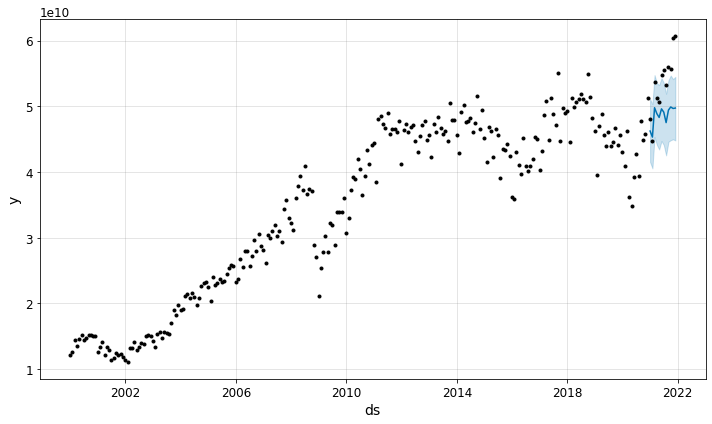

In [ ]:
model.plot(forecast)
plt.show()

### 예측

In [ ]:
# train set 이후 6개월 날짜 생성
last_6month = list()
for i in range(1, 7):
    last_6month.append(['2022-%02d' % i])
last_6month = pd.DataFrame(last_6month, columns = ['ds'])
last_6month['ds']= pd.to_datetime(last_6month['ds'])

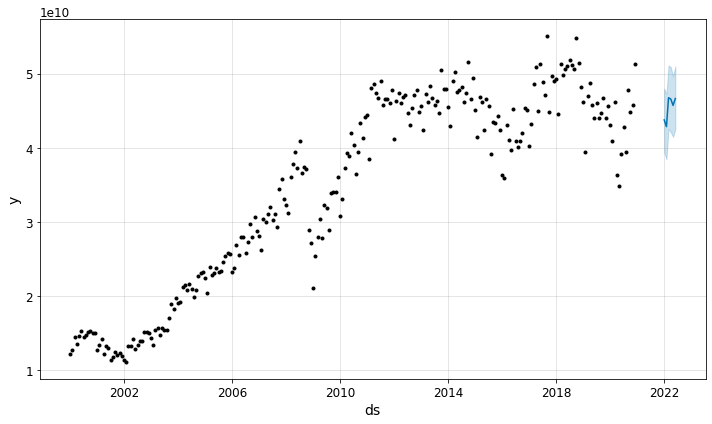

In [ ]:
forecast = model.predict(last_6month)
model.plot(forecast)
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,4.578242e+10,3.939776e+10,4.798908e+10,4.565263e+10,4.591481e+10,-2.023399e+09,-2.023399e+09,-2.023399e+09,-2.023399e+09,-2.023399e+09,-2.023399e+09,0.0,0.0,0.0,4.375902e+10
1,2022-02-01,4.578249e+10,3.846709e+10,4.725690e+10,4.563292e+10,4.594159e+10,-2.937942e+09,-2.937942e+09,-2.937942e+09,-2.937942e+09,-2.937942e+09,-2.937942e+09,0.0,0.0,0.0,4.284455e+10
2,2022-03-01,4.578255e+10,4.253797e+10,5.111924e+10,4.561335e+10,4.595446e+10,9.702413e+08,9.702413e+08,9.702413e+08,9.702413e+08,9.702413e+08,9.702413e+08,0.0,0.0,0.0,4.675279e+10
3,2022-04-01,4.578261e+10,4.208520e+10,5.086779e+10,4.558715e+10,4.597223e+10,7.737061e+08,7.737061e+08,7.737061e+08,7.737061e+08,7.737061e+08,7.737061e+08,0.0,0.0,0.0,4.655632e+10
4,2022-05-01,4.578267e+10,4.146219e+10,4.963253e+10,4.556097e+10,4.599130e+10,-7.070963e+07,-7.070963e+07,-7.070963e+07,-7.070963e+07,-7.070963e+07,-7.070963e+07,0.0,0.0,0.0,4.571196e+10
5,2022-06-01,4.578274e+10,4.250582e+10,5.097387e+10,4.553577e+10,4.601582e+10,8.524065e+08,8.524065e+08,8.524065e+08,8.524065e+08,8.524065e+08,8.524065e+08,0.0,0.0,0.0,4.663514e+10


In [ ]:
forecast.rename(columns = {"yhat_upper": "target"}, inplace = True)

In [66]:
export

,기간,한국_수출금액,한국의_중국_수출,한국의_미국_수출,한국의_베트남_수출,한국의_홍콩_수출,한국의_일본_수출
0,2000-01-01,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,2000-02-01,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,2000-03-01,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,2000-04-01,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,2000-05-01,14636754971,1663240667,3167181403,169411680,887081090,1671039709
...,...,...,...,...,...,...,...
259,2021-08-01,53165103786,13881327880,7704223847,4850337611,3415828590,2522980082
260,2021-09-01,55913862375,14291980345,7983934107,5101701490,3852088155,2541017857
261,2021-10-01,55660372637,14415867215,8066782602,4904971459,2739662629,2614683864
262,2021-11-01,60330542263,15272549044,8133640339,5478296945,3232583381,2813250497


In [ ]:
submission['한국_수출금액'] = forecast['target']

In [ ]:
submission.to_csv('prophet.csv', index = False)